In [1]:
import requests
import pandas as pd

# Step 1: Define the API endpoint and query
agg_url = "https://api.ooni.io/api/v1/aggregation"

params = {
    "axis_x": "probe_cc", 
    "axis_y": "category_code", 
    "since": "2017-01-01",
    "until": "2017-12-31",
    "test_name": "web_connectivity",
    "category_code": "NEWS"
}

# Step 2: Fetch data
response = requests.get(agg_url, params=params)
data = response.json()

# Step 3: Convert to DataFrame
results = data.get("result", [])
df = pd.DataFrame(results)

# Step 4: Filter for confirmed blocks
confirmed_df = df[df["confirmed_count"] > 0].copy()

# Step 5: Sort results by confirmed_count
confirmed_df = confirmed_df.sort_values(by="confirmed_count", ascending=False)

# Display results
print(confirmed_df)

     anomaly_count category_code  confirmed_count  failure_count  \
74            1383          NEWS             1274              0   
68              44          NEWS              131            101   
32             131          NEWS               45              5   
160             24          NEWS               41              0   
138            324          NEWS               25            271   

     measurement_count  ok_count probe_cc  
74               11879      9222       IR  
68                5450      5174       ID  
32                1129       948       CN  
160               1092      1027       TR  
138             137987    137367       RU  


In [2]:
confirmed_df.groupby("probe_cc")["confirmed_count"].sum().sort_values(ascending=False)

probe_cc
IR    1274
ID     131
CN      45
TR      41
RU      25
Name: confirmed_count, dtype: int64

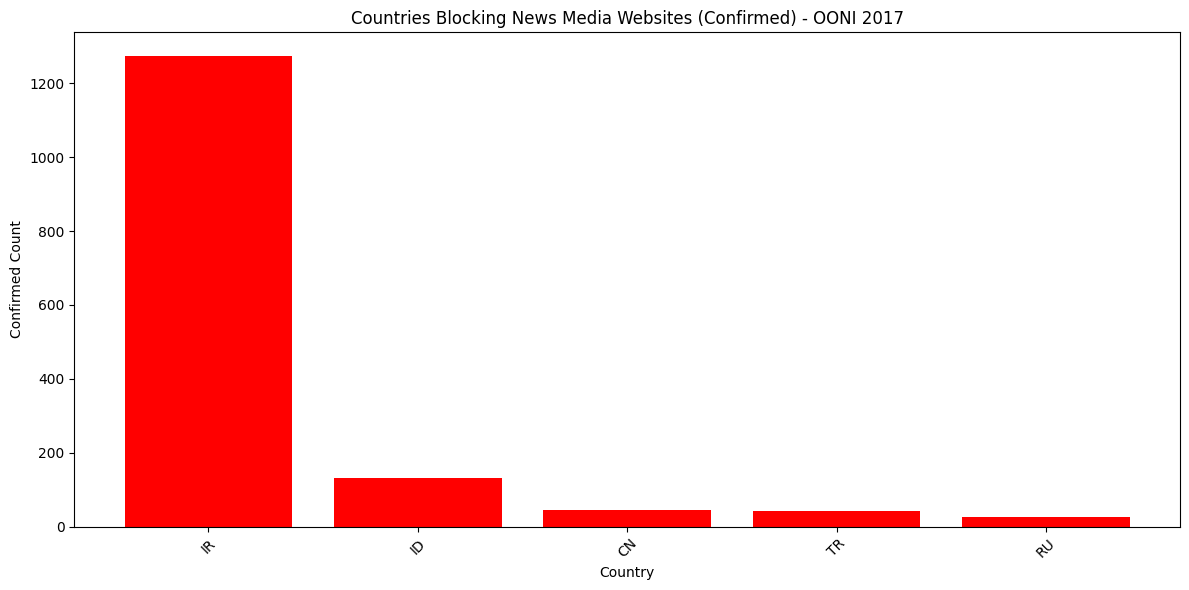

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(confirmed_df['probe_cc'], confirmed_df['confirmed_count'], color='red')
plt.title('Countries Blocking News Media Websites (Confirmed) - OONI 2017')
plt.xlabel('Country')
plt.ylabel('Confirmed Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()